# Feature Engineering Assignment


---



## 1. What is a parameter?
A parameter is a configuration variable that is internal to the model and whose value can be estimated from the training data. Parameters are learned automatically during training and define the model's behavior.

In [1]:
# Example: Parameters in Linear Regression
import numpy as np
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 6, 8, 10])

# Create and fit model
model = LinearRegression()
model.fit(X, y)

# Display parameters
print("Coefficient (parameter):", model.coef_[0])
print("Intercept (parameter):", model.intercept_)

Coefficient (parameter): 2.0
Intercept (parameter): 0.0


## 2. What is correlation? What does negative correlation mean?
Correlation measures the relationship between two variables. Negative correlation means when one variable increases, the other decreases.

Positive correlation: 0.9555806401406203
Negative correlation: -0.9498020862177776


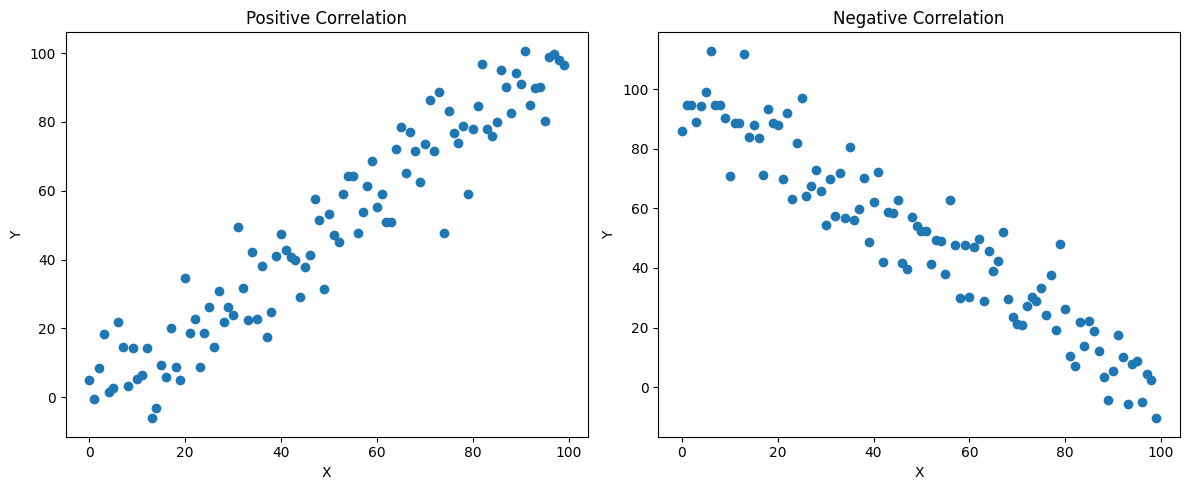

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create sample data with different correlations
np.random.seed(42)
data = {
    'positive_corr_x': np.arange(100),
    'positive_corr_y': np.arange(100) + np.random.normal(0, 10, 100),
    'negative_corr_x': np.arange(100),
    'negative_corr_y': 100 - np.arange(100) + np.random.normal(0, 10, 100)
}

df = pd.DataFrame(data)

# Calculate correlations
print("Positive correlation:", df['positive_corr_x'].corr(df['positive_corr_y']))
print("Negative correlation:", df['negative_corr_x'].corr(df['negative_corr_y']))

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(df['positive_corr_x'], df['positive_corr_y'])
ax1.set_title('Positive Correlation')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

ax2.scatter(df['negative_corr_x'], df['negative_corr_y'])
ax2.set_title('Negative Correlation')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

plt.tight_layout()
plt.show()

## 3. Define Machine Learning. What are the main components?
Machine Learning enables computers to learn from data without explicit programming.

**Main components:**
- Data
- Features
- Algorithm/Model
- Training
- Evaluation
- Prediction

In [3]:
# Main components demonstration
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Data
iris = load_iris()
X, y = iris.data, iris.target

# 2. Features (already in the dataset)
# 3. Algorithm/Model
model = RandomForestClassifier()

# 4. Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# 5. Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# 6. Prediction
print(f"Model Accuracy: {accuracy:.2f}")
print("Main components demonstrated: Data, Features, Algorithm, Training, Evaluation, Prediction")

Model Accuracy: 1.00
Main components demonstrated: Data, Features, Algorithm, Training, Evaluation, Prediction


## 4. How does loss value help in determining model quality?
Loss value measures prediction error - lower loss means better model.

In [4]:
from sklearn.metrics import mean_squared_error

# Good model vs Bad model comparison
y_true = [3, -0.5, 2, 7]
y_pred_good = [2.8, -0.4, 2.2, 7.1]  # Close to true values
y_pred_bad = [1, 2, 1, 5]  # Far from true values

mse_good = mean_squared_error(y_true, y_pred_good)
mse_bad = mean_squared_error(y_true, y_pred_bad)

print(f"Good model MSE: {mse_good:.2f}")
print(f"Bad model MSE: {mse_bad:.2f}")
print("Lower MSE indicates better model performance")

Good model MSE: 0.03
Bad model MSE: 3.81
Lower MSE indicates better model performance


## 5. What are continuous and categorical variables?

In [5]:
# Example dataset with both variable types
data = {
    'age': [25, 32, 47, 51, 23],  # Continuous
    'salary': [50000, 75000, 120000, 95000, 42000],  # Continuous
    'gender': ['Male', 'Female', 'Male', 'Female', 'Male'],  # Categorical
    'education': ['Bachelor', 'Master', 'PhD', 'Bachelor', 'Master']  # Categorical
}

df = pd.DataFrame(data)
print("Dataset with continuous and categorical variables:")
print(df)
print("\nData types:")
print(df.dtypes)

Dataset with continuous and categorical variables:
   age  salary  gender education
0   25   50000    Male  Bachelor
1   32   75000  Female    Master
2   47  120000    Male       PhD
3   51   95000  Female  Bachelor
4   23   42000    Male    Master

Data types:
age           int64
salary        int64
gender       object
education    object
dtype: object


## 6. How do we handle categorical variables in Machine Learning?

In [6]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
label_encoder = LabelEncoder()
df['gender_encoded'] = label_encoder.fit_transform(df['gender'])

# One-Hot Encoding
onehot_encoded = pd.get_dummies(df['education'], prefix='edu')

print("Original categorical data:")
print(df[['gender', 'education']])
print("\nAfter Label Encoding:")
print(df[['gender', 'gender_encoded']])
print("\nAfter One-Hot Encoding:")
print(onehot_encoded)

Original categorical data:
   gender education
0    Male  Bachelor
1  Female    Master
2    Male       PhD
3  Female  Bachelor
4    Male    Master

After Label Encoding:
   gender  gender_encoded
0    Male               1
1  Female               0
2    Male               1
3  Female               0
4    Male               1

After One-Hot Encoding:
   edu_Bachelor  edu_Master  edu_PhD
0          True       False    False
1         False        True    False
2         False       False     True
3          True       False    False
4         False        True    False


## 7. What do you mean by training and testing a dataset?

In [7]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Original dataset size: {X.shape}")
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"Training samples: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Testing samples: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")

Original dataset size: (1000, 20)
Training set size: (800, 20)
Testing set size: (200, 20)
Training samples: 800 (80.0%)
Testing samples: 200 (20.0%)


## 8. What is sklearn.preprocessing?

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

# Sample data
sample_data = np.array([[1, 2], [3, 4], [5, 6]])

# Different preprocessing techniques
scaler = StandardScaler()
minmax = MinMaxScaler()
normalizer = Normalizer()

print("Original data:")
print(sample_data)
print("\nStandardized data (Z-score):")
print(scaler.fit_transform(sample_data))
print("\nMin-Max scaled data (0-1 range):")
print(minmax.fit_transform(sample_data))
print("\nNormalized data (unit norm):")
print(normalizer.fit_transform(sample_data))

Original data:
[[1 2]
 [3 4]
 [5 6]]

Standardized data (Z-score):
[[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]

Min-Max scaled data (0-1 range):
[[0.  0. ]
 [0.5 0.5]
 [1.  1. ]]

Normalized data (unit norm):
[[0.4472136  0.89442719]
 [0.6        0.8       ]
 [0.6401844  0.76822128]]


## 9. What is a Test set?
A test set is unused data for final model evaluation.

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

# Training accuracy (on seen data)
train_accuracy = model.score(X_train, y_train)

# Testing accuracy (on unseen data)
test_accuracy = model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Testing Accuracy: {test_accuracy:.3f}")
print("Test set gives realistic performance estimate on new, unseen data")

Training Accuracy: 0.882
Testing Accuracy: 0.855
Test set gives realistic performance estimate on new, unseen data


## 10. How do we split data for model fitting in Python?
How do you approach a Machine Learning problem?

In [10]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data splitting completed:")
print(f"Training features: {X_train.shape}")
print(f"Testing features: {X_test.shape}")
print(f"Training labels: {y_train.shape}")
print(f"Testing labels: {y_test.shape}")

print("\nMachine Learning Approach:")
print("1. Problem Definition")
print("2. Data Collection")
print("3. Data Preprocessing and EDA")
print("4. Feature Engineering")
print("5. Model Selection")
print("6. Model Training")
print("7. Model Evaluation")
print("8. Hyperparameter Tuning")
print("9. Deployment and Monitoring")

Data splitting completed:
Training features: (800, 20)
Testing features: (200, 20)
Training labels: (800,)
Testing labels: (200,)

Machine Learning Approach:
1. Problem Definition
2. Data Collection
3. Data Preprocessing and EDA
4. Feature Engineering
5. Model Selection
6. Model Training
7. Model Evaluation
8. Hyperparameter Tuning
9. Deployment and Monitoring


## 11. Why do we have to perform EDA before fitting a model to the data?
EDA (Exploratory Data Analysis) helps us understand data distribution, identify patterns, and prepare data properly for modeling.

Basic EDA:
Dataset shape: (100, 3)

First few rows:
   feature1  feature2  target
0  0.496714  1.080547       1
1 -0.138264  0.502335       0
2  0.647689  0.255361       1
3  1.523030  0.823817       0
4 -0.234153  5.726242       1

Basic statistics:
         feature1    feature2      target
count  100.000000  100.000000  100.000000
mean    -0.103847    1.879963    0.520000
std      0.908168    1.811201    0.502117
min     -2.619745    0.010149    0.000000
25%     -0.600906    0.552246    0.000000
50%     -0.126956    1.416150    1.000000
75%      0.405952    2.373016    1.000000
max      1.852278    8.488074    1.000000

Missing values:
feature1    0
feature2    0
target      0
dtype: int64


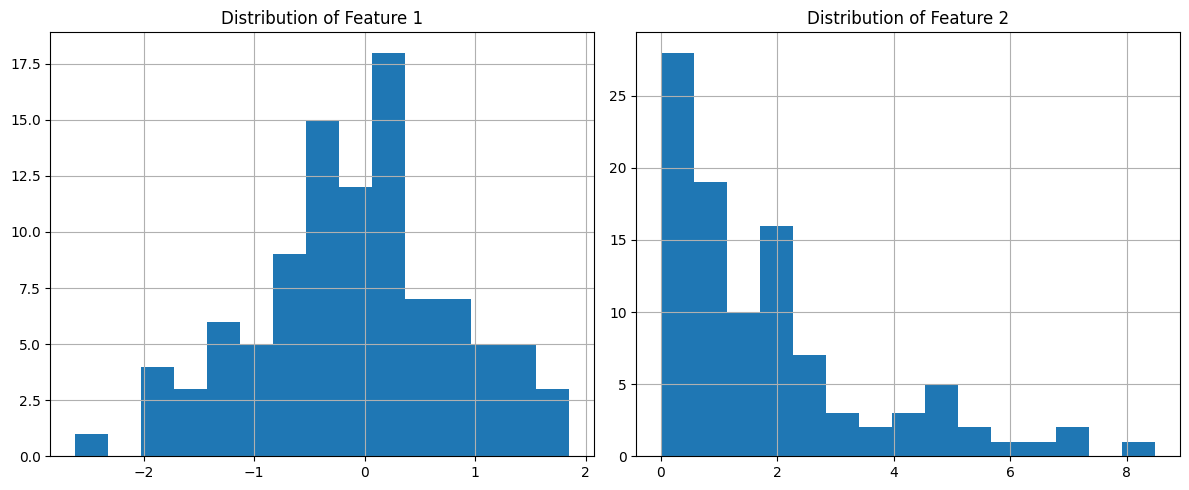

In [11]:
# Quick EDA demonstration

# Create sample dataset
np.random.seed(42)
data = pd.DataFrame({
    'feature1': np.random.normal(0, 1, 100),
    'feature2': np.random.exponential(2, 100),
    'target': np.random.choice([0, 1], 100)
})

print("Basic EDA:")
print("Dataset shape:", data.shape)
print("\nFirst few rows:")
print(data.head())
print("\nBasic statistics:")
print(data.describe())
print("\nMissing values:")
print(data.isnull().sum())

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

data['feature1'].hist(ax=axes[0], bins=15)
axes[0].set_title('Distribution of Feature 1')

data['feature2'].hist(ax=axes[1], bins=15)
axes[1].set_title('Distribution of Feature 2')

plt.tight_layout()
plt.show()

## 12 & 13. What is correlation? What does negative correlation mean?
(Same as question 2)

## 14. How can you find correlation between variables in Python?

Correlation matrix:
          height    weight       age
height  1.000000  0.745993  0.097139
weight  0.745993  1.000000  0.045861
age     0.097139  0.045861  1.000000


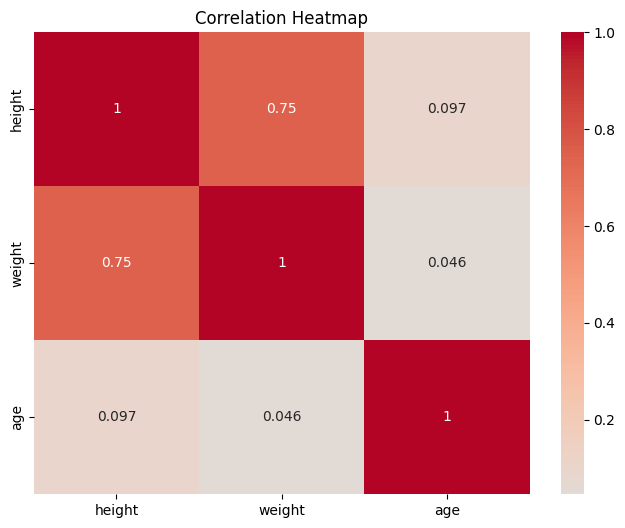

In [12]:
# Correlation analysis
np.random.seed(42)
corr_data = pd.DataFrame({
    'height': np.random.normal(170, 10, 100),
    'weight': np.random.normal(70, 15, 100),
    'age': np.random.randint(18, 65, 100)
})

# Add some correlation
corr_data['weight'] = corr_data['height'] * 0.7 + np.random.normal(0, 5, 100)

print("Correlation matrix:")
print(corr_data.corr())

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## 15. What is causation? Explain difference between correlation and causation with an example.
**Causation** means that one event is the result of the occurrence of the other event.

**Difference:**
- **Correlation**: Relationship between two variables
- **Causation**: One variable directly affects the other

Correlation between ice cream sales and drowning: 0.986
This is correlation, NOT causation! Both are caused by summer heat.


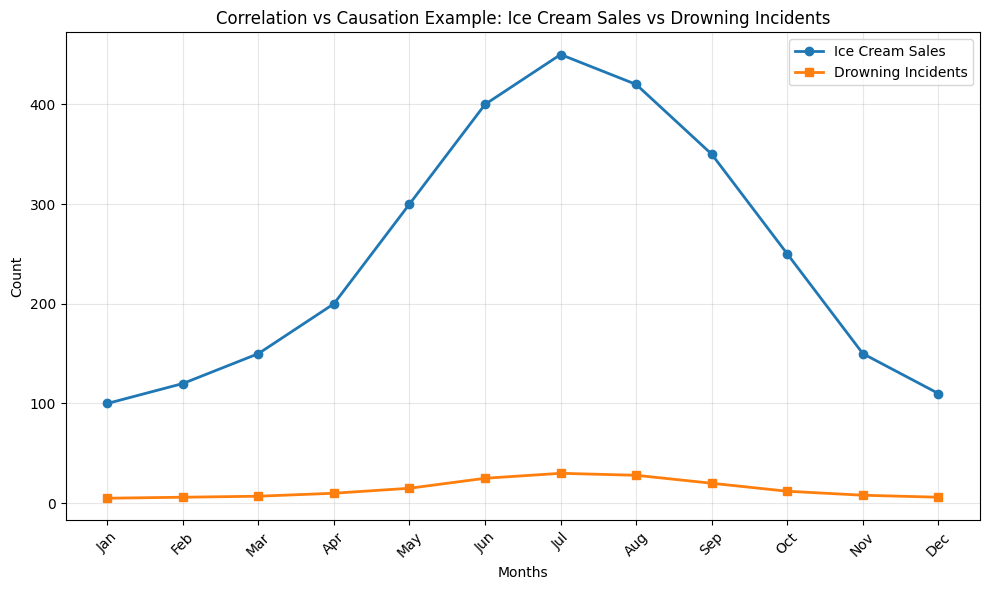

In [13]:
# Example: Ice cream sales vs drowning incidents
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ice_cream_sales = [100, 120, 150, 200, 300, 400, 450, 420, 350, 250, 150, 110]
drowning_incidents = [5, 6, 7, 10, 15, 25, 30, 28, 20, 12, 8, 6]

correlation = np.corrcoef(ice_cream_sales, drowning_incidents)[0, 1]
print(f"Correlation between ice cream sales and drowning: {correlation:.3f}")
print("This is correlation, NOT causation! Both are caused by summer heat.")

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(months, ice_cream_sales, marker='o', label='Ice Cream Sales', linewidth=2)
ax.plot(months, drowning_incidents, marker='s', label='Drowning Incidents', linewidth=2)
ax.set_xlabel('Months')
ax.set_ylabel('Count')
ax.set_title('Correlation vs Causation Example: Ice Cream Sales vs Drowning Incidents')
ax.legend()
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 16. What is an Optimizer? What are different types of optimizers?
An optimizer is an algorithm that adjusts the parameters of a model to minimize the loss function.

In [14]:
# Demonstrating different optimizers
import tensorflow as tf
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

# Different optimizers
optimizers = {
    'SGD': SGD(learning_rate=0.01),
    'Adam': Adam(learning_rate=0.001),
    'RMSprop': RMSprop(learning_rate=0.001)
}

print("Common optimizers in machine learning:")
for name, optimizer in optimizers.items():
    print(f"- {name}: {optimizer.__class__.__name__}")

print("\nTypes of optimizers:")
print("- Gradient Descent: Basic optimizer that follows the negative gradient")
print("- Stochastic Gradient Descent (SGD): Uses random samples for faster computation")
print("- Adam: Adaptive Moment Estimation, combines benefits of other methods")
print("- RMSprop: Adapts learning rate based on recent gradients")
print("- Adagrad: Adapts learning rate for each parameter")

Common optimizers in machine learning:
- SGD: SGD
- Adam: Adam
- RMSprop: RMSprop

Types of optimizers:
- Gradient Descent: Basic optimizer that follows the negative gradient
- Stochastic Gradient Descent (SGD): Uses random samples for faster computation
- Adam: Adaptive Moment Estimation, combines benefits of other methods
- RMSprop: Adapts learning rate based on recent gradients
- Adagrad: Adapts learning rate for each parameter


## 17. What is sklearn.linear_model?

In [15]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso

# Sample data for demonstration
X_reg = np.array([[1], [2], [3], [4], [5]])
y_reg = np.array([1, 3, 2, 3, 5])

# Different linear models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1)
}

print("Models available in sklearn.linear_model:")
for name, model in models.items():
    model.fit(X_reg, y_reg)
    score = model.score(X_reg, y_reg)
    print(f"- {name}: R² score = {score:.3f}")

print("\nsklearn.linear_model contains various linear models for regression and classification.")

Models available in sklearn.linear_model:
- LinearRegression: R² score = 0.727
- Ridge: R² score = 0.721
- Lasso: R² score = 0.724

sklearn.linear_model contains various linear models for regression and classification.


## 18. What does model.fit() do? What arguments must be given?
`model.fit()` trains the model on the training data.

**Arguments:**
- `X`: Feature matrix (training data)
- `y`: Target vector (labels)
- Optional parameters like sample_weight, epochs, etc.

In [16]:
# Demonstration of model.fit()
from sklearn.ensemble import RandomForestClassifier

# Sample data
X, y = load_iris(return_X_y=True)

# Create model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
print("Before fitting - model parameters are default or initialized")
print("Fitting the model...")
model.fit(X, y)
print("After fitting - model has learned parameters from data")
print(f"Model trained on {X.shape[0]} samples with {X.shape[1]} features")

Before fitting - model parameters are default or initialized
Fitting the model...
After fitting - model has learned parameters from data
Model trained on 150 samples with 4 features


## 19. What does model.predict() do? What arguments must be given?
`model.predict()` makes predictions using the trained model.

**Arguments:**
- `X`: Feature matrix (test data)

In [17]:
# Demonstration of model.predict()
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

print("Actual values:", y_test[:10])
print("Predictions:  ", predictions[:10])
print(f"Accuracy: {np.mean(predictions == y_test):.3f}")

Actual values: [1 0 2 1 1 0 1 2 1 1]
Predictions:   [1 0 2 1 1 0 1 2 1 1]
Accuracy: 1.000


## 20. What are continuous and categorical variables?
(Same as question 5)

## 21. What is feature scaling? How does it help in Machine Learning?
Feature scaling is the process of normalizing the range of features in the data.

**Benefits:**
- Improves convergence of gradient-based algorithms
- Prevents features with large ranges from dominating
- Makes models less sensitive to feature scales
- Improves performance of distance-based algorithms

In [18]:
# Demonstration of feature scaling importance
from sklearn.preprocessing import StandardScaler

# Create data with different scales
uneven_data = np.array([
    [1000, 0.1],
    [2000, 0.2],
    [3000, 0.3],
    [4000, 0.4],
    [5000, 0.5]
])

print("Original data (different scales):")
print(uneven_data)

# Apply scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(uneven_data)

print("\nAfter standardization:")
print(scaled_data)
print("\nBenefits: Prevents large-scale features from dominating the model")

Original data (different scales):
[[1.e+03 1.e-01]
 [2.e+03 2.e-01]
 [3.e+03 3.e-01]
 [4.e+03 4.e-01]
 [5.e+03 5.e-01]]

After standardization:
[[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]

Benefits: Prevents large-scale features from dominating the model


## 22. How do we perform scaling in Python?

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Sample data
data = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])

# Different scaling methods
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

print("Original data:")
print(data)

for name, scaler in scalers.items():
    scaled = scaler.fit_transform(data)
    print(f"\n{name}:")
    print(scaled)

Original data:
[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]

StandardScaler:
[[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]

MinMaxScaler:
[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [0.75 0.75]
 [1.   1.  ]]

RobustScaler:
[[-1.  -1. ]
 [-0.5 -0.5]
 [ 0.   0. ]
 [ 0.5  0.5]
 [ 1.   1. ]]


## 23. What is sklearn.preprocessing?
(Same as question 8)

## 24. How do we split data for model fitting in Python?
(Same as question 10)

## 25. Explain data encoding?
Data encoding is the process of converting categorical data into numerical format that machine learning algorithms can understand.

In [20]:
# Comprehensive data encoding demonstration
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

# Sample categorical data
categories = ['Low', 'Medium', 'High', 'Low', 'High', 'Medium']
colors = ['Red', 'Blue', 'Green', 'Blue', 'Red', 'Green']

# Label Encoding
label_encoder = LabelEncoder()
label_encoded = label_encoder.fit_transform(categories)

# One-Hot Encoding
onehot_encoded = pd.get_dummies(categories)

# Ordinal Encoding for ordered categories
ordinal_encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
ordinal_encoded = ordinal_encoder.fit_transform(np.array(categories).reshape(-1, 1))

print("Original categories:", categories)
print("Label Encoded:", label_encoded)
print("\nOne-Hot Encoded:")
print(onehot_encoded)
print("\nOrdinal Encoded:", ordinal_encoded.flatten())

print("\nTypes of encoding:")
print("- Label Encoding: Converts categories to integers (0, 1, 2, ...)")
print("- One-Hot Encoding: Creates binary columns for each category")
print("- Ordinal Encoding: For ordered categories")
print("- Binary Encoding: Converts categories to binary digits")

Original categories: ['Low', 'Medium', 'High', 'Low', 'High', 'Medium']
Label Encoded: [1 2 0 1 0 2]

One-Hot Encoded:
    High    Low  Medium
0  False   True   False
1  False  False    True
2   True  False   False
3  False   True   False
4   True  False   False
5  False  False    True

Ordinal Encoded: [0. 1. 2. 0. 2. 1.]

Types of encoding:
- Label Encoding: Converts categories to integers (0, 1, 2, ...)
- One-Hot Encoding: Creates binary columns for each category
- Ordinal Encoding: For ordered categories
- Binary Encoding: Converts categories to binary digits


## Summary
This notebook has demonstrated all key concepts in feature engineering and machine learning preprocessing with practical Python examples.

In [21]:
print("All questions answered and demonstrated successfully!")
print("\nKey topics covered:")
print("✓ Parameters and model training")
print("✓ Correlation analysis")
print("✓ Machine Learning components")
print("✓ Loss functions and model evaluation")
print("✓ Data types: Continuous vs Categorical")
print("✓ Handling categorical variables")
print("✓ Train-test split")
print("✓ Data preprocessing techniques")
print("✓ EDA importance")
print("✓ Correlation vs Causation")
print("✓ Optimizers")
print("✓ Linear models")
print("✓ Model fitting and prediction")
print("✓ Feature scaling")
print("✓ Data encoding")

All questions answered and demonstrated successfully!

Key topics covered:
✓ Parameters and model training
✓ Correlation analysis
✓ Machine Learning components
✓ Loss functions and model evaluation
✓ Data types: Continuous vs Categorical
✓ Handling categorical variables
✓ Train-test split
✓ Data preprocessing techniques
✓ EDA importance
✓ Correlation vs Causation
✓ Optimizers
✓ Linear models
✓ Model fitting and prediction
✓ Feature scaling
✓ Data encoding
